<div style = "background-color: #AAEEAA; padding: 20px; border: solid;">

## Author: Seyedsaman Emami
saman.emami@hotmail.com
</div>

<p><img src="https://media-exp1.licdn.com/dms/image/C4D03AQF1LXHYsr0quQ/profile-displayphoto-shrink_400_400/0/1621103454279?e=1632355200&v=beta&t=0rdp3ep6hDad8g_yaK4mrJ6ySx7G4lCIMkOS15NZgjw" alt="samanemami" width="100" height="100" class="left" style="float:left"></p>

<hr>

### EDA - Feature engineering and Molde selection
### 30.Jul.2021

# Table of contents
* About the Notebook
* Hypothesis
* Importing Libraries
* EDA
    * Missing values 
    * Data type
    * Distribution
    * relationship between age, and region
    * Pairwise relationship
    * Outlier Detection & treatment
    * PCA
* Model Selection and training
    * Studying age
        * Defining the X, y
            * Numerical Binning - First approach
            * One Hot Encoding
        * Classifier on age as a class label
            * Training 
            * Evaluation
        * Defining the X, y
            * Numerical Binning - 2nd approach
            * One Hot Encoding
        * Predicting age with different inputs
    * Studyin in-store
        * Defining X, y
        * cross-validation
        * Draw a tree for offline purchases
        * Tuning Parameters
* Answering the questions
* Conclusion

<div style="background-color:#EEEEAA;padding:20px;border:solid;">

### About this notebook

This notebook continues the previous task, which was EDA.

All the previous experiments included in this notebook as well with some differences as follows;
<ul>
    <li>I used some methods for only some features.</li>
    <li>Some methods have been updated, such as duplicate parts.</li>
    <li>Outlier detection part, updated.</li>
</ul>

In the following notebook, I considered a demographic dataset for my feature selection purpose.
The notebook follows by;
<ol>
    <li>loading data</li>
    <li>EDA</li> 
    <li>PCA</li> 
    <li>Model Selection</li>
    <li>Fitting the model</li>
    <li>validating the model</li>
</ol>

<h4> The following notebook, had explained in detail as follows </h4>

<hr>
<h3>feature engineering</h3>
At first, I started by importing the dataset and check its descriptions. Then I ran an analysis regarding the relationship between pair variables to have a better understanding of the data. Also, I selected my dependant and independent variables. 
Regarding the principal component analysis, I reduced the dimension of the dataset by considering the "Region" as a class label to have a better understanding of the dataset and visualize its scatter plot.

<hr>
<h3>cross-validation</h3>
In this notebook, I also included the cross-validation method to split the dataset for the sake of training the model and having the generalization accuracy. I implemented two different approaches of cross-validations to train the dataset based on the train and test indexes.

<hr>
<h3>model selection</h3>
For the model selection, I divided this segment into three parts for classification. The model I used is the same for all. I tried to train all selected models in one loop and printed out the score.

Regarding the model selection, I used the foolwoing classifiers;
<ul>
	<li> Decision Tree Classifier </li>
	<li> Random Forest Classifier </li>
	<li> Gradient Boosting Classification </li>
</ul>

<hr>
<h3>Evaluation Metrics</h3>
Regarding the evaluation, the following metrics used for classification;

<ul>
	<li> Accuracy </li>
	<li> Classification report</li>
		<ol>
			<li> precision </li>
			<li> precision </li>
			<li> f1-score </li>
		</ol>
	<li> Confusion Matrix</li>
	<li> CV_result </li>
		<ol>
			<li> test_score </li>
			<li> rank_test_score </li>
			<li> training time </li>
			<li> Scoring time </li>
		</ol>
</ul>


<hr>
<h3>Target treatment</h3>
Regarding the target, I have done the experiments for three different targets, the targets which I considered are as follows;

<ul>
<li> age </li>
<li> in-store </li>
</ul>
The age and amount are naturally continuous, so to implement the classifier on them for the age and the amount, I cut the values into four different classifications and assign them labels. For the labels, I used one hot encoding method to transfer the string labels into the integer values.
<hr>
<h3> Tuning Parameters </h3>
For the hyper-parameter optimization, I used the gridsearch and RandomizedSearchCV from the Sklearn library. I implemented them over the Decision tree as the ML model and two class labels.
Moreover, I printed the optimized hyper-parameters and detailed results of the tunning process.
<hr>
<hr>
Also, I added the hypothesis part to this notebook and at the end of the notebook in the conclusion part, I answered all the bullet points of the hypothesis.
<hr>
<hr>

Author: Seyedsaman Emami

</div>

# Hypothesis

* There would be a relationship between different features of the dataset.
* There is a high correlation between one pair of columns.
* There are duplicated values.
* Do customers in different regions spend more per transaction? Which regions spend the most/least?
* Is there a relationship between number of items purchased and amount spent?

<hr>


* Could we discretize the Amount and use it as a dependent variable? Can a useful model be constructed?
* Are items even in the tree?
* Could we classify the region of purchase and build a model?
* The performance of the random forest would be higher than the Decision tree.
* Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

# 1. Importing Libraries

In [44]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

For the sake of sampling and other experiments, I added a random seed to generate a different seed for functions.

In [45]:
import warnings
warnings.simplefilter('ignore')

Random_seed = random.randint(1, 1000)
print(Random_seed)

9


## 1.1. Obtaining Data

In [46]:
data = pd.read_csv(https://github.com/samanemami/MyScratch/edit/main/Demographic_Data/Demographic_Data.csv')

###  1.1.1. An overview of dataset

In [47]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


### 1.1.2. Check Data description 

In [48]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


# 2. EDA

## 2.1 Check missing values, and data type

In [49]:
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

In [50]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

## 2.2. Dropping duplicates values by subsetting the amount
Dropping duplicates values by subsetting the amount
First of all, I sorted my data frame to have the ideal form of table which I was looking for.

I stored the modified dataset in a *Sorted* DataFram

In [51]:
Sorted = data.sort_values('items', inplace=False)
data_dropped = Sorted.drop_duplicates(inplace=False)

In [52]:
data_dropped.index.duplicated().sum()

0

In [53]:
data_dropped.head()

,in-store,age,items,amount,region
79999,1,30,1,527.12,3
11480,1,28,1,1667.30,4
5453,0,49,1,292.98,2
30008,0,65,1,276.19,2
11485,0,67,1,189.31,2


## 2.3. Exploring the amount of purchase in the different zones

In [54]:
data[['amount','items']].describe()

,amount,items
count,80000.000000,80000.000000
mean,835.919670,4.504975
std,721.273736,2.061238
min,5.004700,1.000000
25%,285.140000,3.000000
50%,582.315000,4.000000
75%,1233.700000,6.000000
max,3000.000000,8.000000


In [60]:
pd.crosstab(index=data['items'], columns=data['region'],
            margins=True).style.background_gradient(cmap='YlGn')

region,1,2,3,4,All
items,,,,,
1,1106,1443,1260,1892,5701
2,2222,2829,2576,3663,11290
3,2317,2801,2599,3770,11487
4,2390,2892,2675,3639,11596
5,2241,2802,2513,3682,11238
6,2358,2892,2515,3757,11522
7,2181,2907,2568,3722,11378
8,1185,1434,1294,1875,5788
All,16000,20000,18000,26000,80000


## 2.4. data distribution
In the following charts, I reviewed the distribution of all variables.

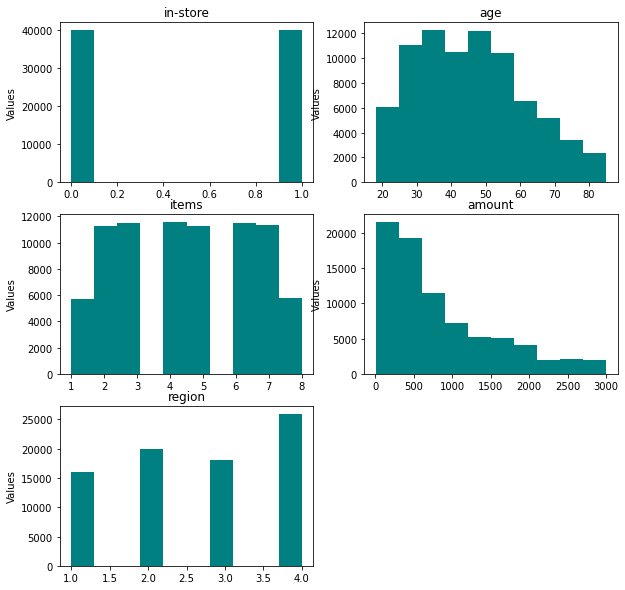

In [12]:
plt.figure(figsize=(10, 10))
for i, j in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(data[j], color='teal', histtype='bar')
    plt.title(str(data.columns[i]))
    plt.ylabel("Values") 

## 2.5. Study the relationship between age, and region of purchase

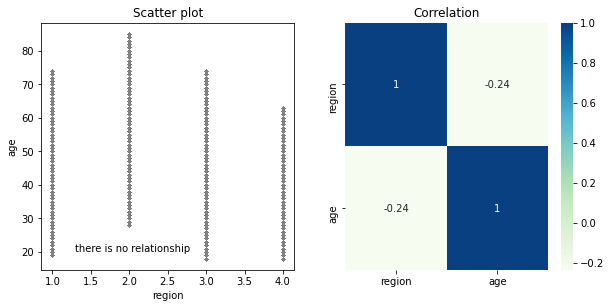

In [13]:
X = data['region']
y = data['age']

df = data[['region', 'age']]

fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.subplot(2, 2, 1)
ax.scatter (X, y, marker=".", color='gray', ls='solid', linewidth=0.1)
ax.set_xlabel('region')
ax.set_ylabel('age')
ax.set_title('Scatter plot')
ax.text(1.3, 20, 'there is no relationship')
ax2 = plt.subplot(2, 2, 2)
sns.heatmap(df.corr("pearson"), annot=True, cmap='GnBu')
ax2.set_title('Correlation')
plt.show()

As the above analyses show, there is no relationship between the age of buyers and the purchase zone.
The scatter plot shows there is no relationship, and the correlation between these two variables proves this matter.

## 2.6. Study the relationship between items, and amount of purchase

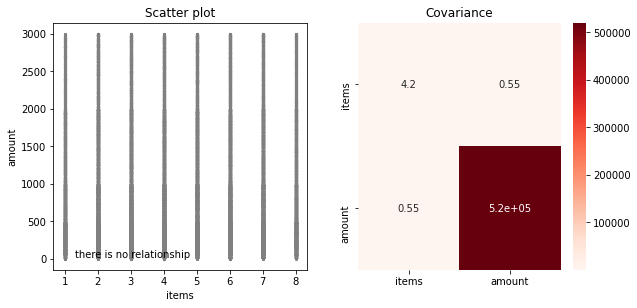

In [14]:
X = data['items']
y = data['amount']

df = data[['items', 'amount']]

fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.subplot(2, 2, 1)
ax.scatter (X, y, marker=".", color='gray', ls='solid', linewidth=0.1)
ax.set_xlabel('items')
ax.set_ylabel('amount')
ax.set_title('Scatter plot')
ax.text(1.3, 20, 'there is no relationship')
ax2 = plt.subplot(2, 2, 2)
sns.heatmap(df.cov(), annot=True, cmap='Reds')
ax2.set_title('Covariance')
plt.show()

## 2.7. pairwise relationships in a dataset
In the following plot, we can observe the relationship between pair variables.
<hr>
To have this plot, I extract a random unit from the dataset and plot it over the samples.

<Figure size 1008x1008 with 0 Axes>

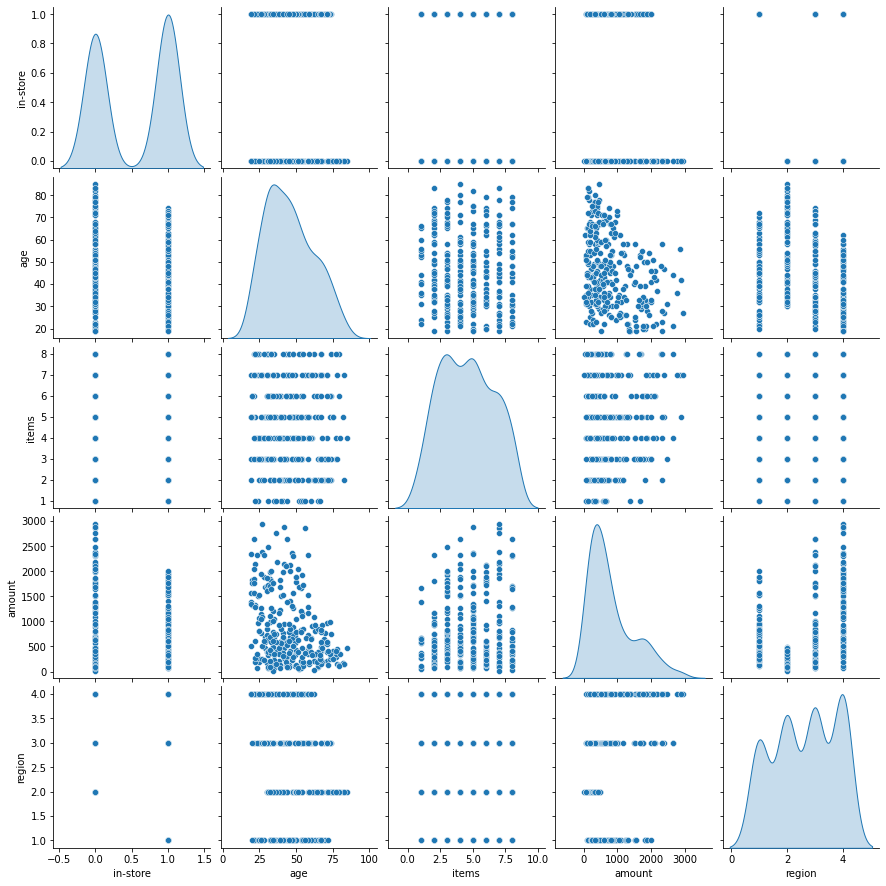

In [15]:
sample=data.sample(n=300)
plt.figure(figsize=(14, 14))
sns.pairplot(sample, diag_kind='kde')

The above plot also gives us the correlation of pair variables. 
The correlation between the age of a customer and region illustrates that the second region has older customers than others.

The correlation between the number of items purchased and the amount spent demonstrates that when the price goes up, the purchase items will reduce.

## 2.8. Outlier Detection & treatment

### 2.8.1 Detecting Outliers
Detecting Outliers with Z-scores by computing z-score (mean/std)

In [16]:
amount_z = (data.amount).values
outliers = []
thres = 3
mean = np.mean(amount_z)
std = np.std(amount_z)
for i in amount_z:
    z_score = (i-mean)/std
    if (np.abs(z_score) > thres):
        outliers.append(i)
print('outliers:', outliers)

outliers: [3000.0, 3000.0, 2999.8]


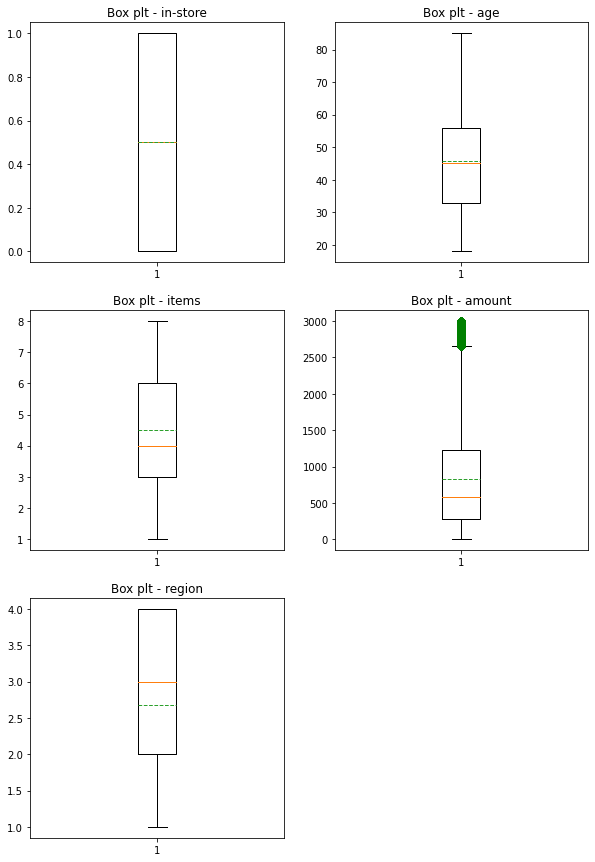

In [57]:
plt.figure(figsize=(10, 15))
for i, j in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.boxplot(Sorted[j], 0, 'gD', showmeans=True,
                meanline=True, autorange=True)
    plt.title('Box plt - ' + str(data.columns[i]))

As we can see in the amount, we have outliers values.

After seeing the box plot, I curious about the "amount" feature, so I decided to have a subsample of it and compare it with its median. 

### 2.8.2 Removing Outliers

In [17]:
amount = data.amount
Q1 = np.percentile(amount, 25, interpolation='midpoint')
Q3 = np.percentile(amount, 65, interpolation='midpoint')
IQR = Q3 - Q1
amount.shape
upper = np.where(amount>=(Q3+1.5*IQR))
lower = np.where(amount<=(Q1-1.5*IQR))
new = pd.DataFrame(amount)
new.drop(upper[0], inplace=True)
new.drop(lower[0], inplace=True)
print(new.shape)
new.head()

(69934, 1)


,amount
0,281.03
1,219.51
2,1525.70
3,715.25
5,1314.20


Text(0.5, 1.0, 'Removed outliers')

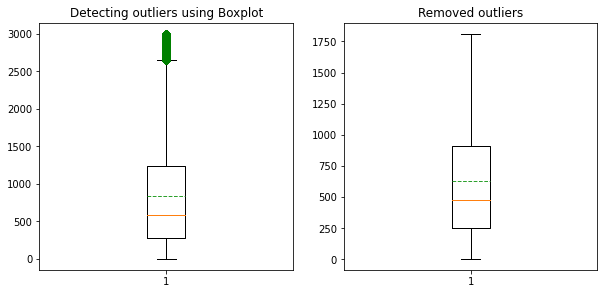

In [18]:
amount = data.amount
Q1 = np.percentile(amount, 25, interpolation='midpoint')
Q3 = np.percentile(amount, 65, interpolation='midpoint')
IQR = Q3 - Q1
amount.shape
upper = np.where(amount>=(Q3+1.5*IQR))
lower = np.where(amount<=(Q1-1.5*IQR))
new_amount = pd.DataFrame(amount)
new_amount.drop(upper[0], inplace=True)
new_amount.drop(lower[0], inplace=True)


fig, ax = plt.subplots(figsize=(10, 10))
ax1 = plt.subplot(2, 2, 1)
plt.boxplot(amount, 0, 'gD', showmeans=True,
            meanline=True, autorange=True)
ax1.set_title("Detecting outliers using Boxplot")
ax2 = plt.subplot(2, 2, 2)
plt.boxplot(new_amount, 0, 'gD', showmeans=True,
            meanline=True, autorange=True)
ax2.set_title("Removed outliers")

## 2.9. PCA
### 2.9.1. Reducing the dimensions of the dataset

First, I am going to reduce the dimension of the dataset to visualize it better and understand the data better.

### 2.9.2. Normalizing the dataset
Transform the features to have zero mean one as the standard deviation

In [19]:
df_pca = data
X = (df_pca.drop(columns=['region'])).values
y = (df_pca['region']).values
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

In [20]:
pca = PCA(n_components=2)
pcaScale = pca.fit_transform(X)
pcadf = pd.DataFrame(data=pcaScale, columns=[
                     'PCA_1', 'PCA_2'])
df = pd.concat([pcadf, df_pca.region.iloc[:200,]], axis=1)
df.head()

,PCA_1,PCA_2,region
0,-0.326699,0.383947,2.0
1,-0.281287,0.279076,2.0
2,0.894530,-0.409340,4.0
3,0.150594,-0.970191,3.0
4,1.810928,-0.190053,1.0


### 2.9.3. 2D Visualization

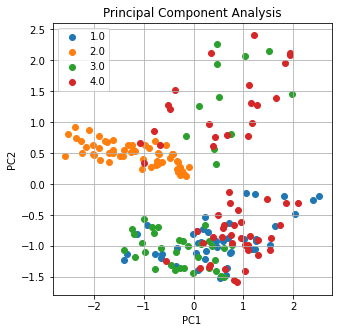

In [21]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

names = []
for i in range(len(np.unique(y))):
    names.append(float(i+1))
cmap = ['r', 'g', 'b', 'y']
for name, cmap in zip(names, cmap):
    target = df["region"] == name
    ax.scatter(df.loc[target, "PCA_1"], df.loc[target, "PCA_2"])
plt.xlabel("PC1", color='black')
plt.ylabel("PC2", color='black')
plt.title("Principal Component Analysis")
plt.legend(names)
plt.grid()

From the above plot, we can understand more about the data the distribution of the regions for 2 features, and sample of dataset with 200 instances.

# 3. Studying age
## 3.1. Defining the X, y


For the first part, I chose the *"age"* as the target, and it would be a multi-class classification problem. I consider the rest of the features as independent variables.

Also I Converted the data frame to data dict as I am going to use Sklearn library and it would be so easy to work with the following structure and build the supervised model

### 3.1.1. Numerical Binning
### 3.1.1.1. First approach
Applying Binning on numerical data "age".

To create the new labels feature, I have to have the edges and mean of feature and cut the features based on them.

<h4>In the first approach I consider four classes for the age feature</h4>

In [22]:
print('\n', 'Min age:', data.age.min(), '\n',
      'Max age:', data.age.max(), '\n',
      'Mean age:', data.age.mean())


 Min age: 18 
 Max age: 85 
 Mean age: 45.757925


I created a new feature called "Age_bins" from the cut method of pandas

In [23]:
data['age_bins'] = pd.cut(data['age'], bins=[17, 30, 50, 60, 85], labels=['20s', '40s', '60s', '80s'])
data['age_bins'].head()

0    40s
1    40s
2    40s
3    40s
4    40s
Name: age_bins, dtype: category
Categories (4, object): ['20s' < '40s' < '60s' < '80s']

In [24]:
data.head()

,in-store,age,items,amount,region,age_bins
0,0,37,4,281.03,2,40s
1,0,35,2,219.51,2,40s
2,1,45,3,1525.70,4,40s
3,1,46,3,715.25,3,40s
4,1,33,4,1937.50,1,40s


### 3.1.2. One Hot Encoding
to discretize the continuous values, I used the Encoding method.

In [25]:
y = LabelEncoder().fit_transform(data['age_bins'])
n_classes = len(np.unique(y))
data = data.drop(columns=['age_bins'])
X = (data.drop(columns=['age'])).values
print("number of classes:", n_classes)

number of classes: 4




## 3.2. Classifier on age as a class label
<br>
<h3> Splitting the dataset</h3>

For the sake of training the machine learning model and validating it, I am going to use the cross-validation method. 
To achieve this goal, I import the ShuffleSplit from the Sklearn library.

```Python
from sklearn.model_selection import KFold
```

I split the dataset with kfold cross-validation, in which at each iteration one fold will leave out and the model trains over other folds and in-train validation will do with left out folds, it continues this approach up to two folds.
<hr>
<h3>Defining the Classifiers</h3>
As I choose the <span style='background:yellow'> age</span> for the class labels and already have the target labels, I use the  supervised classification model for the multi-class.
The models I selected are as follows;
<ul>
<li>Decision Tree classifier</li>
<li>Random Forest classifer</li>
<li>Gradient Boosting Classifier </li>
</ul>
The reason for selecting these two models is to show their performance and superiority.
To compare their performance, I train each model in a loop regarding the train and test indices.
<h4>Hyper parameters</h4>
Hyperparameters
The value of hyperparameters for each classifier has shown in the definition of models.
The number of trees in both Random Forest and Gradient boosting is the same. 

The loss in Gradient boosting refers to the loss function of the additive form of gradient boosting model. The criterion in this model refers to the split criterion of trees after having enough information to go to the next branch.

<h4>Metrics</h4>
The metric to evaluate the models is accuracy. I did not import the accuracy as Sklearn already wrote its method in the models, and the method calls the "score".

```Python
model.score(x_test, y_test)
```

### 3.2.1 Training the model
<h4>class label = age </h4>

In [26]:
pred_tree = np.zeros_like((y))
pred_forest = np.zeros_like((y))
pred_gbm = np.zeros_like((y))


score_tree = []
score_forest = []
score_gbm = []

kfold = KFold(n_splits=3, random_state=Random_seed, shuffle=True)

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    Decision_Tree = DecisionTreeClassifier(
        max_depth=10, random_state=Random_seed)
    Decision_Tree.fit(X_train, y_train)
    pred_tree[test_index] = Decision_Tree.predict(X_test)
    score_tree.append(Decision_Tree.score(X_test, y_test))

    Random_Forest = RandomForestClassifier(max_depth=5, n_estimators=100,
                                           max_features=None,
                                           random_state=Random_seed)
    Random_Forest.fit(X_train, y_train)
    pred_forest[test_index] = Random_Forest.predict(X_test)
    score_forest.append(Random_Forest.score(X_test, y_test))

    GBM = GradientBoostingClassifier(max_depth=5,
                                     subsample=0.5,
                                     max_features="sqrt",
                                     learning_rate=0.25,
                                     random_state=Random_seed,
                                     criterion="mse",
                                     loss="deviance",
                                     n_estimators=100)
    GBM.fit(X_train, y_train)
    pred_gbm[test_index] = GBM.predict(X_test)
    score_gbm.append(GBM.score(X_test, y_test))

score_tree = np.mean(score_tree)
score_forest = np.mean(score_forest)
score_gbm = np.mean(score_gbm)

print("\n", "Accuracy-Decision tree:", '{0:.1f}%'.format(score_tree * 100), "\n",
      "Accuracy-Random Forest:", '{0:.1f}%'.format(score_forest * 100), "\n",
      "Accuracy-Gradient boosting machine:", '{0:.1f}%'.format(score_gbm * 100))


 Accuracy-Decision tree: 45.4% 
 Accuracy-Random Forest: 46.1% 
 Accuracy-Gradient boosting machine: 44.4%


<div> <h3 style="align-content:center:padding:70px;color:white;background-color:#A5430E;float:left;border:solid">These accuracies are the average of three cross-validation folds </h3> </div>

### 3.2.2. Evaluation
<h4>class label = age </h4>

In this part, I am evaluating the performance of the classifiers.

As we have cross-validation, therefore I have to take to account the predicted values of each test index against all y values as we are evaluating inside the cross-validation.

Text(946.764705882353, 0.5, 'Real values')

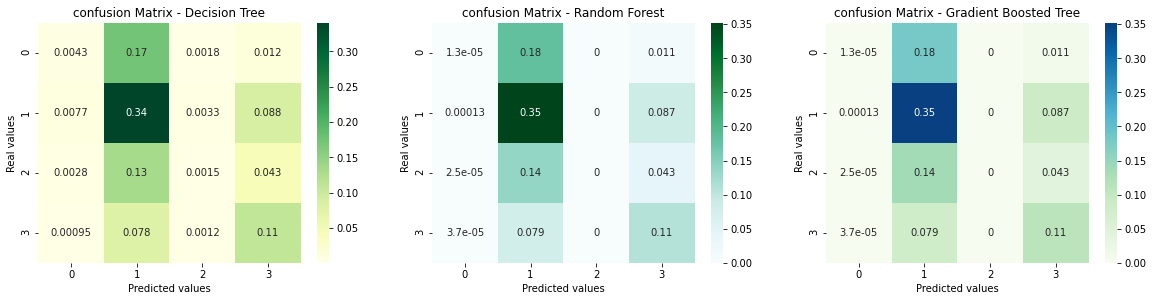

In [27]:
fig, ax = plt.subplots(figsize=(20, 15))
ax1 = plt.subplot(3, 3, 1)
sns.heatmap(confusion_matrix(y, pred_tree, normalize='all'), annot=True, cmap='YlGn')
ax1.set_title('confusion Matrix - Decision Tree')
ax1.set_xlabel('Predicted values')
ax1.set_ylabel('Real values')

ax2 = plt.subplot(3, 3, 2)
sns.heatmap(confusion_matrix(y, pred_forest, normalize='all'), annot=True, cmap='BuGn')
ax2.set_title('confusion Matrix - Random Forest')
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Real values')

ax3 = plt.subplot(3, 3, 3)
sns.heatmap(confusion_matrix(y, pred_forest, normalize='all'), annot=True, cmap='GnBu')
ax3.set_title('confusion Matrix - Gradient Boosted Tree')
ax3.set_xlabel('Predicted values')
ax3.set_ylabel('Real values')

### 3.1.1. Numerical Binning
### 3.1.1.2. Second approach


 min age: 18 - max age: 85 
 ----- 
 bins: [18.         40.33333333 62.66666667 85.        ] 
 ----- 
 Labels: ['Teenage', 'Middle age', 'Adults'] 
 -----


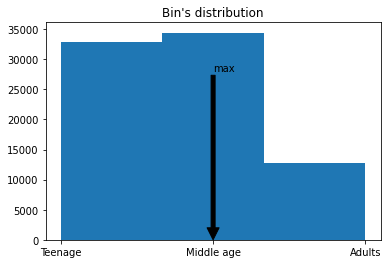

In [28]:
min = data.age.min()
max = data.age.max()
bins = np.linspace(min, max, 4)
labels = ['Teenage', 'Middle age', 'Adults']
print("\n", "min age:", min, "- max age:", max, "\n", "-----",
      "\n", "bins:", bins, "\n", "-----", "\n", "Labels:", labels, "\n", "-----")
data['age_bins2'] = pd.cut(data['age'], bins=bins,
                           labels=labels, include_lowest=True)

plt.title('Bin\'s distribution')
plt.hist(data['age_bins2'], bins=3)
plt.annotate('max', xy=(1, 2), xytext=(1, 28000),
             arrowprops=dict(facecolor='black', shrink=1),
             )
plt.savefig('bins.png')

In [29]:
y = LabelEncoder().fit_transform(data['age_bins2'])
n_classes = len(np.unique(y))

data.drop(columns=['age_bins2'], inplace=True)
X = (data.drop(columns=['age'], inplace=False)).values

print("number of classes:", n_classes)

number of classes: 3


<h3>Training the same model with different seed</h3>

<h4>class label = age </h4>

In [30]:
pred_tree = np.zeros_like(y)
pred_forest = np.zeros_like(y)
pred_gbm = np.zeros_like(y)


score_tree = []
score_forest = []
score_gbm = []

kfold = KFold(n_splits=3, random_state=Random_seed, shuffle=True)

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    Decision_Tree = DecisionTreeClassifier(
        max_depth=10, random_state=Random_seed)
    Decision_Tree.fit(X_train, y_train)
    pred_tree[test_index] = Decision_Tree.predict(X_test)
    score_tree.append(Decision_Tree.score(X_test, y_test))

    Random_Forest = RandomForestClassifier(max_depth=5, n_estimators=100,
                                           max_features=None,
                                           random_state=Random_seed)
    Random_Forest.fit(X_train, y_train)
    pred_forest[test_index] = Random_Forest.predict(X_test)
    score_forest.append(Random_Forest.score(X_test, y_test))

    GBM = GradientBoostingClassifier(max_depth=5,
                                     subsample=0.5,
                                     max_features="sqrt",
                                     learning_rate=0.25,
                                     random_state=Random_seed,
                                     criterion="mse",
                                     loss="deviance",
                                     n_estimators=100)
    GBM.fit(X_train, y_train)
    pred_gbm[test_index] = GBM.predict(X_test)
    score_gbm.append(GBM.score(X_test, y_test))

score_tree = np.mean(score_tree)
score_forest = np.mean(score_forest)
score_gbm = np.mean(score_gbm)

print("\n", "Accuracy-Decision tree:", '{0:.1f}%'.format(score_tree * 100), "\n",
      "Accuracy-Random Forest:", '{0:.1f}%'.format(score_forest * 100), "\n",
      "Accuracy-Gradient boosting machine:", '{0:.1f}%'.format(score_gbm * 100))


 Accuracy-Decision tree: 47.4% 
 Accuracy-Random Forest: 47.8% 
 Accuracy-Gradient boosting machine: 46.7%


Text(946.764705882353, 0.5, 'Real values')

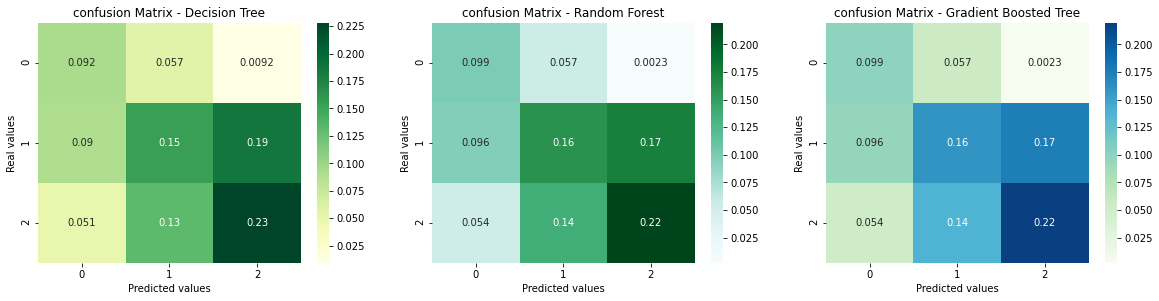

In [31]:
fig, ax = plt.subplots(figsize=(20, 15))
ax1 = plt.subplot(3, 3, 1)
sns.heatmap(confusion_matrix(y, pred_tree, normalize='all'), annot=True, cmap='YlGn')
ax1.set_title('confusion Matrix - Decision Tree')
ax1.set_xlabel('Predicted values')
ax1.set_ylabel('Real values')

ax2 = plt.subplot(3, 3, 2)
sns.heatmap(confusion_matrix(y, pred_forest, normalize='all'), annot=True, cmap='BuGn')
ax2.set_title('confusion Matrix - Random Forest')
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Real values')

ax3 = plt.subplot(3, 3, 3)
sns.heatmap(confusion_matrix(y, pred_forest, normalize='all'), annot=True, cmap='GnBu')
ax3.set_title('confusion Matrix - Gradient Boosted Tree')
ax3.set_xlabel('Predicted values')
ax3.set_ylabel('Real values')

<div style="height:40px"><h2 style = "align-content:center;padding:10px;color:white;background-color:#A4644E;float:left;margin-top:0px;border:solid";> Analyzing of different (Age) Binning methods </h2>
</div>

<div style="height:40px"><h4 style = "align-content:center;padding:10px;color:white;background-color:#A4644E;float:left;margin-top:0px;border:solid";> The confusion matrix reveals that the second strategy is working better, as we can see the smaller error in Matrix and the diagonal of confusion matrix in the second binning method is promising.  </h4>
</div>

## 3.3. Predicting age with different inputs
In the following cell, at each epoch, I considered one different variable as an input of the model to predict the age.

               in-store     items    amount    region
Test accuracy  0.447865  0.429167  0.454427  0.470469
                in-store     items    amount    region
train accuracy  0.449605  0.430181  0.470148  0.472928


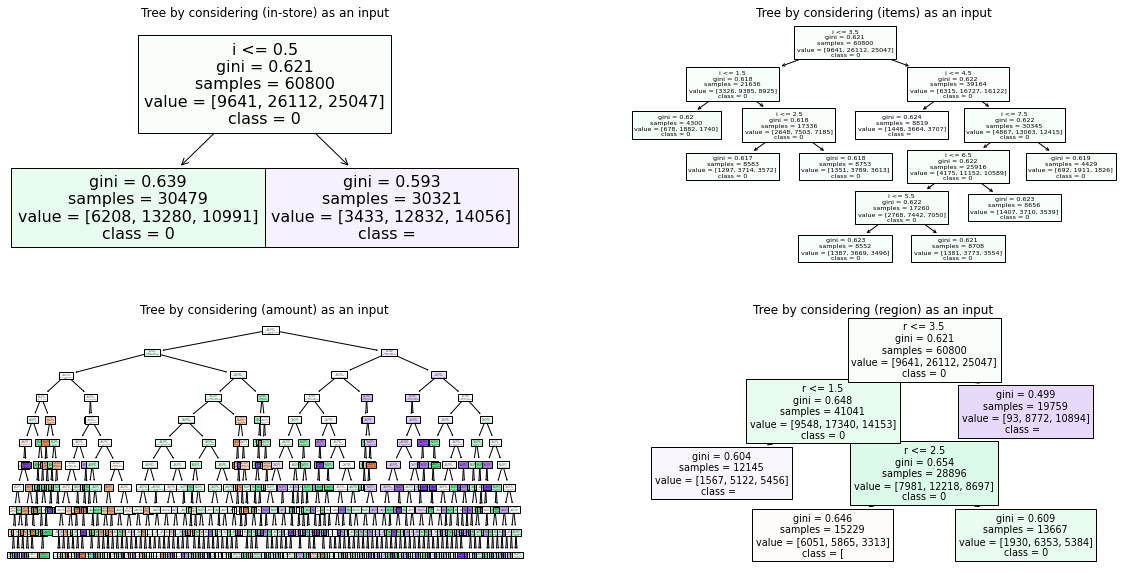

In [32]:
acc = {}
acc_train = {}
X = (data.drop(columns=['age'], inplace=False))
ax = plt.subplots(figsize=(20, 10))
for i, j in enumerate(X.columns):
    x = (X[j].values)
    x = x.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.24, random_state=Random_seed)
    Decision_Tree = DecisionTreeClassifier(
        max_depth=10, random_state=Random_seed)
    Decision_Tree.fit(x_train, y_train)
    acc[str(j)] = Decision_Tree.score(x_test, y_test)
    acc_train[str(j)] = Decision_Tree.score(x_train, y_train)
    ax1 = plt.subplot(2, 2, i+1)
    plot_tree(Decision_Tree, feature_names=j ,class_names=str(np.unique(y)), filled=True)
    ax1.set_title('Tree by considering (' + j + ') as an input')
    fig.savefig('tree.png', dpi=300)
print(pd.DataFrame(acc, index=['Test accuracy']))
print(pd.DataFrame(acc_train, index=['train accuracy']))

As one can see, the tree for amount as an input, had to have more leaves to gain information and it is a bit noisy.

From the above table, we can check the effects of different variables for predicting age separately. The best variable based on the achieved accuracy would be <span style='background:yellow'> amount</span> and <span style='background:yellow'> region</span>. Also, the tree of each separate input has drawn.

Therefore, I **Build a model** to predict the age, based on two features <span style='background:yellow'> amount</span> and <span style='background:yellow'> region</span>.

In [33]:
X = (data[['region', 'amount']]).values
n = 3
acc = np.zeros((n,))
kfold = StratifiedKFold(n_splits=n, shuffle=True, random_state=Random_seed)
for i, (train_index, test_indes) in enumerate(kfold.split(X, y)):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = Decision_Tree = DecisionTreeClassifier(
        max_depth=10, random_state=Random_seed)
    param = dict(max_depth=(10, 20), splitter=('best', 'random'))
    clf = RandomizedSearchCV(model, param, random_state=Random_seed)
    clf.fit(x_train, y_train)
    acc[i-1] = accuracy_score(y_test, clf.predict(x_test))

print('accuracy:', np.mean(acc))
print('accuracy of each fold:', acc)

accuracy: 0.4722493062326558
accuracy of each fold: [0.47224931 0.47224931 0.47224931]


<h5> Tuned the hyperparameter of the Decision Tree classifier through the Randomized Search CV and train, and text indices by three folds cross-validation to have better accuracy.</h5>
<hr> 
<h5> As we can see, the accuracy has improved due to considering two highly correlated features as input and tunning hyper-parameters. </h5>

# 4. Classifier on in-store as a class label
<h3> cross-validation Training model </h3>
<h4> class label = in-store </h4>

## 4.1. Defining X, y

In [34]:
data['in-store'].unique()

array([0, 1], dtype=int64)

In [35]:
X = (data.iloc[:, 1:]).values
y = (data.iloc[:, 1]).values

## 4.2. cross-validation
cross-validation for the same models and different targets. The target in this part is the "in-store" of purchase.

In [36]:
results = {}

names = ['Decision_Tree', 'Random_Forest']


models = [DecisionTreeClassifier(
    max_depth=20, random_state=Random_seed),
    RandomForestClassifier(max_depth=20, n_estimators=100,
                           max_features='sqrt',
                           random_state=Random_seed)]


for name, model in zip(names, models):
    result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    names.append(name)
    results[name] = result

In [37]:
print('\n','Average accuracy:','\n', pd.DataFrame(results).min())
print('=============')
print('Accuracy of models for each fold:')
pd.DataFrame(results)


 Average accuracy: 
 Decision_Tree    0.812125
Random_Forest    0.978875
dtype: float64
Accuracy of models for each fold:


,Decision_Tree,Random_Forest
0,0.812375,0.991250
1,0.812500,0.985500
2,0.812375,0.980625
3,0.812500,0.985500
4,0.812500,0.982125
5,0.812375,0.986000
6,0.812125,0.983625
7,0.812125,0.978875
8,0.812125,0.983875
9,0.812125,0.984125


As the above results illustrate, the models' performances are better for the <span style='background:yellow'> **in-store purchase** </span>  as our target class.
The process of one Hot encoding for this target is not needed as the target is <span style='background:green;color:white'>binary</span>. This part contains a different approach in terms of model selection, as I implemented different methods of cross-validation.  Moreover, I tried to train all models in one loop, so I print all the accuracy of folds in one dictionary. 

## 4.3. Draw a tree for offline purchases
Regarding different inputs to check the correlation and effect of each feature on the target.

,age,items,amount,region
Test accuracy,0.50099,0.023177,0.023385,0.021146


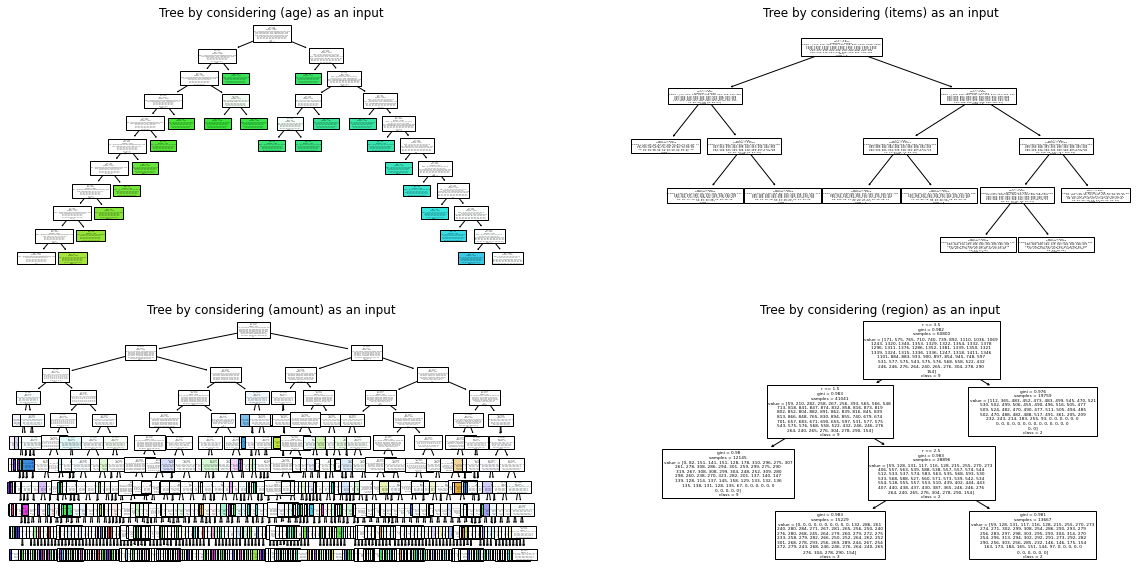

In [38]:
acc = {}
acc_train = {}
X = (data.drop(columns=['in-store'], inplace=False))
ax = plt.subplots(figsize=(20, 10))
for i, j in enumerate(X.columns):
    x = (X[j].values)
    x = x.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.24, random_state=Random_seed)
    Decision_Tree = DecisionTreeClassifier(
        max_depth=10, random_state=Random_seed)
    Decision_Tree.fit(x_train, y_train)
    acc[str(j)] = Decision_Tree.score(x_test, y_test)
    ax1 = plt.subplot(2, 2, i+1)
    plot_tree(Decision_Tree, feature_names=j ,class_names=str(np.unique(y)), filled=True)
    ax1.set_title('Tree by considering (' + j + ') as an input')
    fig.savefig('tree.png', dpi=300)
(pd.DataFrame(acc, index=['Test accuracy']))

From the above result, we understand that age has the highest relationship with the in-store variable, and the rest of them have an insignificant relationship with the class target.

## 4.4. Tuning Parameters 
<h4>Studying the in-store</h4>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=Random_seed)


model = DecisionTreeClassifier(
    max_depth=5, max_features='sqrt', random_state=Random_seed)
params = {'max_depth': [10, 20, 30], 'max_features': [
    None, 'sqrt'], 'splitter': ['best', 'random']}
clf = GridSearchCV(model, params, cv=3, refit=True, return_train_score=True)
clf.fit(x_train, y_train)


print("test accuracy:", "{0:.2f}%".format(
    clf.cv_results_['mean_test_score'][clf.best_index_] * 100))
print("train accuracy:", "{0:.2f}%".format(
    clf.cv_results_['mean_train_score'][clf.best_index_] * 100))


test accuracy: 100.00%
train accuracy: 100.00%


<h4> From the 100 percent accuracy and result of different input for "in-store", we found that there is overfitting, so in the following, I only trained and tunned the model for "age" as an input. </h4>

In [40]:
X = (data.age).values
X = X.reshape(-1, 1)
y = (data['in-store']).values

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=Random_seed)


model = DecisionTreeClassifier(
    max_depth=5, max_features='sqrt', random_state=Random_seed)
params = {'max_depth': [10, 20, 30], 'max_features': [
    None, 'sqrt'], 'splitter': ['best', 'random']}
clf = GridSearchCV(model, params, cv=3, refit=True, return_train_score=True)
clf.fit(x_train, y_train)


print("test accuracy:", "{0:.2f}%".format(
    clf.cv_results_['mean_test_score'][clf.best_index_] * 100))
print("train accuracy:", "{0:.2f}%".format(
    clf.cv_results_['mean_train_score'][clf.best_index_] * 100))


test accuracy: 59.07%
train accuracy: 59.18%


From the following table, we can see the training time, train and test accuracy of the model for each fold of the gridsearch.

In [41]:
(pd.DataFrame(clf.cv_results_)).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.055120,0.000531,0.009200,0.000343,10,None,best,"{'max_depth': 10, 'max_features': None, 'split...",0.588785,0.58905,0.59437,0.590735,0.002573,1,0.592968,0.592218,0.590087,0.591757,0.00122
1,0.027425,0.000541,0.009566,0.000378,10,None,random,"{'max_depth': 10, 'max_features': None, 'split...",0.588785,0.58905,0.59437,0.590735,0.002573,1,0.592968,0.592218,0.590087,0.591757,0.00122
2,0.053314,0.001168,0.009197,0.001024,10,sqrt,best,"{'max_depth': 10, 'max_features': 'sqrt', 'spl...",0.588785,0.58905,0.59437,0.590735,0.002573,1,0.592968,0.592218,0.590087,0.591757,0.00122
3,0.027843,0.000020,0.010202,0.000918,10,sqrt,random,"{'max_depth': 10, 'max_features': 'sqrt', 'spl...",0.588785,0.58905,0.59437,0.590735,0.002573,1,0.592968,0.592218,0.590087,0.591757,0.00122
4,0.061013,0.003808,0.011188,0.002533,20,None,best,"{'max_depth': 20, 'max_features': None, 'split...",0.588785,0.58905,0.59437,0.590735,0.002573,1,0.592968,0.592218,0.590087,0.591757,0.00122


I printed the best parameters which the model achieved during the tunning h-params.


In [42]:
clf.best_params_

{'max_depth': 10, 'max_features': None, 'splitter': 'best'}

Therefore, the optimized hyper-parameters for this model and dataset are the above values.

# 5. Classify where a transaction took place

In [43]:
X = (data[['in-store', 'age', 'items', 'amount']]).values
y = (data.region).values
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=Random_seed)

model = DecisionTreeClassifier(
    max_depth=5, max_features='sqrt', random_state=Random_seed)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print("\n", "classification_report of Decision tree",
      classification_report(y_test, pred), "\n")
print('accuracy:', '{0:.2f}%'.format(accuracy_score(y_test, pred)*100))


 classification_report of Decision tree               precision    recall  f1-score   support

           1       0.41      0.55      0.47      8088
           2       0.90      1.00      0.95      9965
           3       0.54      0.23      0.32      8971
           4       0.65      0.72      0.68     12976

    accuracy                           0.64     40000
   macro avg       0.63      0.62      0.61     40000
weighted avg       0.64      0.64      0.62     40000
 

accuracy: 64.46%


<div style="height:40px"><h1 style="align-content:center;padding:10px;color:white;background-color:#A4644E;float:left;margin-top:0px;border:solid">Answering the questions</h1>

<div style="align-content:center;padding:20px;color:white;background-color:#A4644E;float:left;margin-top:0px;border: solid;">


<h4> Q1. The correlation between the age of a customer and where the transaction took place </h4>

<h5> Answer 1. </h5>
 
In section 2.5, I studied the correlation between age and region. 
Also, I plotted the scatter and noticed no relationship between the age of customers and the place where the purchase took 
place. 
    
On the other hand, I draw a tree for age as a class label and region as an input. It has a tree branch with a second binning strategy. It has three branches. With this modeling, we can find that indeed there was no correlation between these two features, but the model for region as input and age, as the label has higher accuracy, the relationship between these two is stronger than others with age.
    
    
Moreover, when I considered in-store as a target, I found that all other input except for age, has noise and my model is overfitted, so only age had a relationship with in-store purchasing.

<hr>


<h4> Q2. The correlation between number of items purchased and amount spent </h4>  

<h5> Answer 2. </h5>  

In section 2.6, if we convert the scatter plot to a line plot, we notice that there is no trend, and the line behavior would 
be neutral. The covariance matrix proves the fact that there is no relationship between the amount of purchase and purchase 
item, as the value is about 50 percent, and we can not see the change direction and variance between variables.


<hr>

<h4> Q3. Are items even in the tree? Why or why not? </h4>

<h5> Answere 3. </h5>
    
No. Because there is no relationship between "items" and the target of the model.


<h4> Q4. Can classify Where a transaction took place successfully? </h4>

<h5> Answer 4. </h5>

Yes, I discretized the region (the place of transaction) and implemented the Decision Tree Classifier over it. 
    
```Python
model = DecisionTreeClassifier(
    max_depth=5, max_features='sqrt', random_state=Random_seed)
model.fit(x_train, y_train)
```


<h4> Q5. explain how the results of each classifier run supports your conclusions </h4>

<h5> Answer 5. </h5>
    
From the result of each classifier, we can understand which binning method gives us better performance, and we can compare the binning approach with the data distribution, for instance, age distribution.

Moreover, as I trained some models for different inputs, I could connect its results to the correlation output and compare them together.

The performance of each classifier and model based on different metrics had explained in the following section 
(conclusion), and at the end of each cell.

<hr>

<h4> Q6. results from your notebook </h4>

<h5> Answer 6. </h5>   

All the results are included in the cnclusion cell.

Also, I implemented different metrics for evaluation and different classifiers as well. Also, for splitting, I took advantage of different spitting strategies.
</div>

<div style="height:40px"><h2 style="align-content:center;padding:10px;color:black;background-color:#EEEEAA;float:left;margin-top:0px;border:solid">Conclusion</h2>

<div style = "background-color: #EEEEAA; padding: 20px; border: solid;">

This conclusion, contains two parts, the first part is related to EDA and my findings from EDA, and second part is for model selection and my results    
    
My studies included sorting, histogram, scatter plots, box plots, data frame, correlations, covariance, and shape of the arrays.

<h3> EDA </h3>
I studied the relationship between pair variables as following;
<ul>
    <li> ['region', 'age'] </li>
    <li> ['items', 'amount'] </li>
</ul>
Moreover, I studied the relationship of all pairwise variables in on cell.
    
    
From the previous studies, I found that we have duplicate values in one of our features which were "amount" so I removed them and continue with the new dataset.

Also, from different methods such as the box plot and z-score, I tried to deal with the outliers, So I defined the various percentile of the relevant axis to drop them

Moreover, this work contains a comprehensive approach in terms of feature engineering and model selection.


I explained each specific part as follows.
<h3> correlation </h3>
To have a clean notebook for the pairwise relationship, I implemented a method from the seaborn library. The return of this method is a plot that shows the relationship and correlation between pair variables. The correlation between the customer age and region illustrates that the second region has older customers than others, and the first and third regions have almost the same age range of customers.
The correlation between the number of items purchased and the amount spent demonstrates that when the price goes up, the purchase of items will reduce.

<hr> 
To have a summary of our features, I grouped the dataset into different parts and studied them separately. My studies included sorting, histogram, scatter plots, box plots, data frame, correlations, covariance size of the data, and shape of the arrays.

From the previous studies, I found that we have duplicate values in one of our features which were "amount" so I removed them and continue with the new dataset.

Also, from different plots such as the box plot, I noted the outliers values, So I defined the various percentile of the relevant axis to drop them. After removing outliers, I compared the shape, size, and behavior of the removed outliers and the principal dataset.


* I found a relationship and correlation between different features of the dataset.
* There were duplicate values in the dataset.
* Customers in regions one and four, spent more money to buy their items. And region two has the lowers amount of purchase.
* There is a relationship between number of items purchased and amount spent.    

<hr>
<h3> Model selection </h3> 
    
<h3>classifier results</h3>
Regarding the classifiers, I implemented three methods over the dataset by considering different variables as my dependant variable. The metric which I chose for the comparison is the accuracy of the model.

The results are as follows;

<h5> class label = age </h5>

| Method | Dependant variable | Accuracy | Binning Strategy |
| :- | :-: | :- | :-: |
| Decision Tree Classifier| age | 45.4% | 1 - four labels
| Random Forest | age | 46.1%  | 1 - four labels
| Gradient boosting machine | age | 44.4% | 1 - four labels
| Decision Tree Classifier| age | 47.4% | 2 - three labels
| Random Forest | age | 47.8%  | 2 - three labels
| Gradient boosting machine | age | 46.7% | 2 - three labels

The results of models regarding the **age** as a class label are about 44% for the first binning strategy which shows that the model performance is not good. I have to mention that these experiments have been done in two different strategies. The second one is regarding the three labels in the class, which shows some improvements. Also, implementing the confusion matrix over two strategies prove that three bins strategy gives better performance of the model.
    
With the fact that I used the cross-validation method and three different methods, we can conclude that the dataset needs to be rebuild.
    
Moreover, to check the effects of different inputs on age, I trained the Decision Tree Classifier Model over age, and at each epoch, I considered different inputs. The results for this experiment are as the following table;
    
| Input | Accuracy | Binnig Strategu |
| :- | :-: | :-: |
| in-store | 44.78% | Second Strategy
| items | 42.91% | Second Strategy 
| amount | 45.44% | Second Strategy
| region | 47.04% | Second Strategy

Based on the correlation, we know that there is a relationship between age and region, but, as the accuracy of models over **age** as a multi-class show, we can not use these models to predict the age of the customers by having different demographic datasets. But, between different inputs, the region and amount achieved better performance.

<h5> Build a model only with amount and region as inputs </h5>
    
As these two inputs return better accuracy in the previous table, I trained a model (Decision Tree Classifier) over age with these two inputs. The splitting strategy here was Kfold cross-validation. And I achieved 47.22% accuracy.


<h5> class label = in-store</h5>

First I did cross-validation for two models (Decision Tree classifier and Random Forest) with the following results.

| Method | folds | Accuracy |
| :- | :-: | :- |
| Decision Tree Classifier| 10 | 81.21% 
| Random_Forest| 10 | 97.88 %

We can see that increasing folds of cross-validation brings better results, and Random Forest over "in-store" has a better result.
    
Also, I trained the Decision Tree for different inputs and draw a tree for each input with the following accuracy;
    
| Input | Accuracy | 
| :- | :-: |
| age | 50.09% | 
| items | 2.31% | 
| amount | 2.33% | 
| region | 2.11% |

This shows that age has the highest relationship with offline purchasing.
    
For the next step, I tuned the hyperparameters with the gridsearch method, and I got 100 accuracy, which shows the overfitting, so with these results, I knew that the problem comes from the rest of the inputs, so I only considered age and trained the model again, and this time the accuracy was 59.07% for test split.
    
Also, in the case of gridsearch, I printed out the detailed results of grid search and select hyper-parameters as the optimum values.

<h5> class label = region</h5>

| Method | Tunning hyper-parameter | Accuracy |
| :- | :-: | :- |
| Decision Tree Classifier| GridSearchCV | 64.46% 


This experiment shows that I could predict the place where the transaction happened.

    
<hr>
  
<h5>In this notebook I used </h5>
    
* Decision Tree classifier
* Random Fores
* Gradient Boosting classifier
* As my models.

<h5>For the splitting method, I implemented</h5>
    
* K-Fold Cross-Validation
* Stratified split
* StratifiedKFold Cross-Validation
* cross_val_score

Moreover, I tunned h-params with GridSearchCV

<h5>For metrics, I used</h5>
    
* Model score (return accuracy)
* accuracy from the Sklearn metrics
* Confusion matrix
* precision    
* recall  
* score
* selected h-params
* Tree plot
 

<h3> Author: Seyedsaman Emami </h3>
</div>